**Work Sample Problem**

In [34]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.spatial

Average of the distance between  POI1  to each of its assigned requests is  3.3531117689402192
Standard Deviation of the distance between  POI1  to each of its assigned requests is  3.849640081597129
Radius for  POI1  is  24.85193722989386
Density for  POI1  is  4.496711933878297 



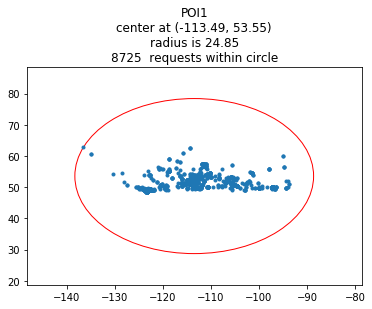

No request mapped to  POI2 so the Average of distance is 0
No request mapped to  POI2 so the Standard Deviation of distance is 0
No request mapped to  POI2 so the Radius is 0
No request mapped to  POI2 so the Density is 0 

Average of the distance between  POI3  to each of its assigned requests is  5.537919139655465
Standard Deviation of the distance between  POI3  to each of its assigned requests is  2.8587108750939807
Radius for  POI3  is  20.155377791591437
Density for  POI3  is  6.911718842827215 



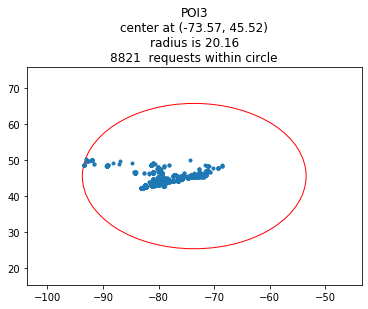

Average of the distance between  POI4  to each of its assigned requests is  8.522389808711118
Standard Deviation of the distance between  POI4  to each of its assigned requests is  27.33458316385116
Radius for  POI4  is  192.7049913074258
Density for  POI4  is  0.00366009261696348 



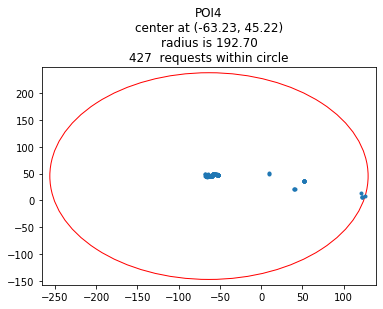

In [38]:
# making data frame from csv file 
data = pd.read_csv("DataSample.csv")

poiList = pd.read_csv("POIList.csv")

# cleanup suspicious sample records that have identical geoinfo and timest
data.drop_duplicates(subset=[' TimeSt', 'Latitude', 'Longitude'], keep=False, inplace = True)

#Assign each request from data to the closest POI from poiList
labels = scipy.spatial.distance.cdist(data[['Latitude', 'Longitude']], poiList[[' Latitude', 'Longitude']], metric='euclidean')
data['POIID']=poiList.reindex(labels.argmin(1)).POIID.values

# Analysis
#For each POI, calculate the average and standard deviation of the distance between the POI to each of its assigned requests.
# Draw a Circle for each POI

#interation over POIs
for i in range(poiList.shape[0]):
    poiId = poiList.iloc[i,0]
    lat0 = poiList.iloc[i,1]
    long0 = poiList.iloc[i,2]
    
    #interation over data samples
    lat = []
    long = []
    for j in range(data.shape[0]):
        if(poiId in data.iloc[j,-1]):            
            lat.append(data.iloc[j,5])
            long.append(data.iloc[j,6])
    
    #to ensure exceptional handling, ex. for POI2
    if lat:
        #distance of samples for each POI
        dist = np.sqrt((long - long0)**2 + (lat - lat0)**2)
        
        print ('Average of the distance between ', poiId, ' to each of its assigned requests is ',statistics.mean(dist))
        print ('Standard Deviation of the distance between ', poiId, ' to each of its assigned requests is ',statistics.stdev(dist))
        
        # compute radius
        r0 = max(dist)
        # compute the density
        d = (len(dist))/(math.pi*r0*r0)        
        
        print ('Radius for ', poiId, ' is ',r0)
        print ('Density for ', poiId, ' is ',d,'\n')
        
        # make plot    
        plt.plot(long, lat, '.')
        circle = plt.Circle((long0, lat0), r0, color='r', fill=False)
        plt.gca().add_artist(circle)
        plt.title('{}\n'
          'center at ({:.2f}, {:.2f})\n'
          'radius is {:.2f}\n'
          '{}  requests within circle'.format(
          poiId,long0, lat0, r0, len(dist)))
        plt.axis([long0-r0-10, long0+r0+10, lat0-r0-10, lat0+r0+10])
        plt.show()
        
    else:
        print('No request mapped to ', poiId, 'so the Average of distance is 0')
        print('No request mapped to ', poiId, 'so the Standard Deviation of distance is 0')
        print('No request mapped to ', poiId, 'so the Radius is 0')
        print('No request mapped to ', poiId, 'so the Density is 0 \n')
        